Import Packages

In [1]:
import math
import numpy as np
import statistics as st
import tabulate
import pandas as pd
import matplotlib.pyplot as plt

Load Dataset

In [2]:
df = pd.read_excel('data.xlsx')
Mark = list(df.Mark)
df

,Name,Mark
0,Bonna,6
1,Md. Shafiqul,3
2,MST. TANIA,14
3,Minhazul,0
4,Fahim,10
5,Sadia,22
6,Rayhan,21
7,Md. Jahid,9
8,Shakila,16
9,Partho,10


Number of Class and Class Interval

In [3]:
H, L ,n= max(Mark), min(Mark), len(Mark)
k = math.ceil((1 + 3.322 * math.log10(n)))
i = math.ceil((H-L)/k)
k,i

(7, 4)

Table arrangement

In [4]:
main_list = list()
sub_list = list()
con = np.arange(L,H,i)
con = list(con)
con.append(H)
j=0
while j<k:
    sub_list.append(con[j])
    j=j+1
    sub_list.append(con[j])
    get=0
    for key in Mark:
        if key >= con[j-1] and key < con[j] :
            get+=1
        elif j==k and key==con[k]:
            get+=1
    sub_list.append(get)

    temp=sub_list.copy()
    main_list.append(temp)
    sub_list.clear()
main_list

[[0, 4, 3],
 [4, 8, 8],
 [8, 12, 12],
 [12, 16, 15],
 [16, 20, 6],
 [20, 24, 6],
 [24, 25, 4]]

Distribution Table

In [5]:
import tabulate
head = list()
tbl_main_list = list()
tbl_sub_list = list()
fr_get=0
j=0
while j<k:
    tbl_sub_list.append(str(main_list[j][0])+' - '+str(main_list[j][1]))
    tbl_sub_list.append(main_list[j][2])
    if j==0:
        fr_get+=main_list[j][2]
        tbl_sub_list.append(fr_get)
        
    else:
        fr_get+=main_list[j][2]
        tbl_sub_list.append(fr_get)

    temp1 = tbl_sub_list.copy()
    tbl_main_list.append(temp1)
    tbl_sub_list.clear()
    j+=1

head.append('Mark')
head.append('Frequency')
head.append('Cumulative Frequency')
print(tabulate.tabulate(tbl_main_list,headers=head,tablefmt='fancy_grid'))

╒═════════╤═════════════╤════════════════════════╕
│ Mark    │   Frequency │   Cumulative Frequency │
╞═════════╪═════════════╪════════════════════════╡
│ 0 - 4   │           3 │                      3 │
├─────────┼─────────────┼────────────────────────┤
│ 4 - 8   │           8 │                     11 │
├─────────┼─────────────┼────────────────────────┤
│ 8 - 12  │          12 │                     23 │
├─────────┼─────────────┼────────────────────────┤
│ 12 - 16 │          15 │                     38 │
├─────────┼─────────────┼────────────────────────┤
│ 16 - 20 │           6 │                     44 │
├─────────┼─────────────┼────────────────────────┤
│ 20 - 24 │           6 │                     50 │
├─────────┼─────────────┼────────────────────────┤
│ 24 - 25 │           4 │                     54 │
╘═════════╧═════════════╧════════════════════════╛


Mean, Median, Mode, Variance, Standard Deviation, Coefficient of Variation

In [6]:
print('Mean : ',st.mean(Mark))
print('Median : ',st.median(Mark))
print('Mode : ',st.mode(Mark))
print('Variance : ',st.variance(Mark))
print('Standard Deviation : ',round(st.stdev(Mark),2))
cv=lambda x: np.std(Mark, ddof=1) / np.mean(x) * 100
print('Coefficient of Variation : '+str(round(cv(Mark)))+' %')

Mean :  13
Median :  13.0
Mode :  14
Variance :  40.301886792452834
Standard Deviation :  6.35
Coefficient of Variation : 49 %


Graph arrangement

In [7]:
frequency, mid , cu_frequency= list(), list(), list()
for i in tbl_main_list:
    frequency.append(i[1])
    cu_frequency.append(i[2])

for i in range(len(con)):
    try:
        mid.append((con[i]+con[i+1])/2)
    except:
        pass
mid, frequency, cu_frequency

([2.0, 6.0, 10.0, 14.0, 18.0, 22.0, 24.5],
 [3, 8, 12, 15, 6, 6, 4],
 [3, 11, 23, 38, 44, 50, 54])

Graph

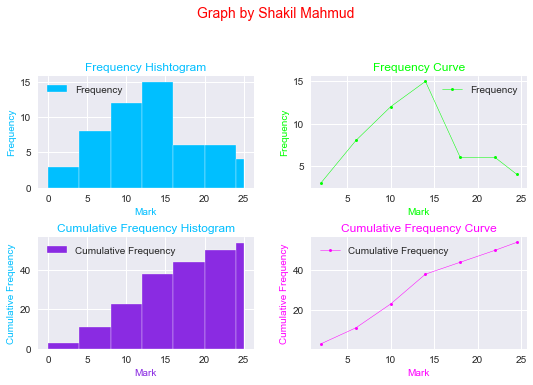

In [8]:
plt.style.use('seaborn')
fig,ax= plt.subplots(2,2)
fig.suptitle('Graph by Shakil Mahmud',color='red',size=14)
fig.tight_layout(pad=3)

ax[0,0].set_title('Frequency Hishtogram',color='deepskyblue',size=12)
ax[0,0].hist(Mark,con,color='deepskyblue',edgecolor='w',label='Frequency')
ax[0,0].set_xlabel('Mark',color='deepskyblue',size=10)
ax[0,0].set_ylabel('Frequency',color='deepskyblue',size=10)
ax[0,0].legend()


ax[0,1].set_title('Frequency Curve',color='lime',size=12)
ax[0,1].plot(mid,frequency,color='lime',linewidth=0.5,marker='o',markersize=3,label='Frequency')
ax[0,1].set_xlabel('Mark',color='lime',size=10)
ax[0,1].set_ylabel('Frequency',color='lime',size=10)
ax[0,1].legend()


ax[1,0].set_title('Cumulative Frequency Histogram',color='deepskyblue',size=12)
ax[1,0].hist(Mark,con,cumulative=True,color='blueviolet',edgecolor='w',label='Cumulative Frequency')
ax[1,0].set_xlabel('Mark',color='blueviolet',size=10)
ax[1,0].set_ylabel('Cumulative Frequency',color='deepskyblue',size=10)
ax[1,0].legend()




ax[1,1].set_title('Cumulative Frequency Curve',color='fuchsia',size=12)
ax[1,1].plot(mid,cu_frequency,color='fuchsia',linewidth=0.5,marker='o',markersize=3,label='Cumulative Frequency')
ax[1,1].set_xlabel('Mark',color='fuchsia',size=10)
ax[1,1].set_ylabel('Cumulative Frequency',color='fuchsia',size=10)
ax[1,1].legend()

plt.show()

Project Completed. Thank You for visit !